1. Primero vamos a importar las librerias necesarias

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import seaborn as sns

2. Ahora vamos a conectar drive con nuestro cuaderno, para poder importar nuestra base de datos.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Cargamos nuestra base de datos.

In [3]:
base_de_datos_covid_1= pd.read_csv('/content/drive/MyDrive/Universidad/Tesis/casos-asociados-a-covid-19-support.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


4. Ahora vamos a ver algunos aspectos, para entender nuestros datos.

4. 1.Imprimir la base de datos.

In [4]:
base_de_datos_covid_1.head()

,id,fecha_actualizacion,id_registro,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,...,pais_origen,uci,rango_edad,num_fallecidos,num_hospitalizados,indigena,toma_muestra,clasificacion_final,positivo,pendiente
0,0,2020-10-07,1d276b,USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Azcapotzalco,...,NO APLICA,NO,51-60,1.0,1.0,2,2,6,NaN,Resultado pendiente
1,1,2020-10-07,0fbbc1,FUERA DE USMER,PRIVADA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Cuauhtémoc,...,NO APLICA,NO,31-40,NaN,1.0,2,2,6,NaN,Resultado pendiente
2,2,2020-10-07,02331b,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Cuauhtémoc,...,NO APLICA,NO APLICA,81-90,NaN,NaN,2,1,6,NaN,Resultado pendiente
3,3,2020-10-07,0973e1,USMER,ISSSTE,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Iztapalapa,...,NO APLICA,NO,31-40,1.0,1.0,2,2,6,NaN,Resultado pendiente
4,4,2020-10-07,080c77,USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Iztapalapa,...,NO APLICA,NO APLICA,31-40,NaN,NaN,2,2,6,NaN,Resultado pendiente


4. 2.Imprimir la cantidad de datos que tiene nuestra base de datos.

In [5]:
print('Cantidad de datos de la base de datos:\n', base_de_datos_covid_1.shape)

Cantidad de datos de la base de datos:
 (489305, 44)


4. 3.Imprimir los tipos de datos de nuestra base de datos.

In [6]:
print('Tipos de datos de la base:\n', base_de_datos_covid_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489305 entries, 0 to 489304
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   489305 non-null  int64  
 1   fecha_actualizacion  489305 non-null  object 
 2   id_registro          489305 non-null  object 
 3   origen               489305 non-null  object 
 4   sector               489305 non-null  object 
 5   entidad_um           489305 non-null  object 
 6   sexo                 489305 non-null  object 
 7   entidad_nac          489305 non-null  object 
 8   entidad_res          489305 non-null  object 
 9   municipio_res        412129 non-null  object 
 10  tipo_paciente        489305 non-null  object 
 11  fecha_ingreso        489305 non-null  object 
 12  fecha_sintomas       489305 non-null  object 
 13  fecha_def            23455 non-null   object 
 14  intubado             489305 non-null  object 
 15  neumonia         

4. 4.Imprimir el número de datos faltantes por columna.

In [7]:
print('Datos faltantes en la base de datos:\n', pd.isnull(base_de_datos_covid_1).sum())

Datos faltantes en la base de datos:
 id                          0
fecha_actualizacion         0
id_registro                 0
origen                      0
sector                      0
entidad_um                  0
sexo                        0
entidad_nac                 0
entidad_res                 0
municipio_res           77176
tipo_paciente               0
fecha_ingreso               0
fecha_sintomas              0
fecha_def              465850
intubado                    0
neumonia                    0
edad                        0
nacionalidad                0
embarazo                    0
habla_lengua_indi           0
diabetes                    0
epoc                        0
asma                        0
inmusupr                    0
hipertension                0
otra_com                    0
cardiovascular              0
obesidad                    0
renal_cronica               0
tabaquismo                  0
otro_caso                   0
negativo               220196
mi

4. 5.Imprimir las estadísticas de todas las columnas utilizando el parámetro include.

In [8]:
base_de_datos_covid_1.describe(include = "all")

,id,fecha_actualizacion,id_registro,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,...,pais_origen,uci,rango_edad,num_fallecidos,num_hospitalizados,indigena,toma_muestra,clasificacion_final,positivo,pendiente
count,489305.00000,489305,489305,489305,489305,489305,489305,489305,489305,412129,...,489305,489305,489225,23455.0,64097.0,489305.000000,489305.000000,489305.000000,161628,58568
unique,NaN,1,489305,2,12,32,2,33,32,16,...,50,4,11,NaN,NaN,NaN,NaN,NaN,1,1
top,NaN,2020-10-07,1d276b,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Iztapalapa,...,NO APLICA,NO APLICA,31-40,NaN,NaN,NaN,NaN,NaN,Positivo SARS-CoV-2,Resultado pendiente
freq,NaN,489305,1,382755,364027,479299,250099,372011,406810,58618,...,488798,425208,106817,NaN,NaN,NaN,NaN,NaN,161628,58568
mean,244652.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,6.023358,1.045922,5.479212,NaN,NaN
std,141250.33107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,19.355005,0.209317,1.884631,NaN,NaN
min,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,1.000000,1.000000,1.000000,NaN,NaN
25%,122326.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,2.000000,1.000000,3.000000,NaN,NaN
50%,244652.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,2.000000,1.000000,7.000000,NaN,NaN
75%,366978.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,2.000000,1.000000,7.000000,NaN,NaN


5. Vamos a ir cambiando los tipos de datos según sea conveniente.

5. 1.Columna de "origen".

In [9]:
# Ahora vamos a cambiar los datos de origen por valores numéricos
base_de_datos_covid_1['origen'].replace(['USMER', 'FUERA DE USMER'],[0,1],inplace=True)

5. 2.Columna de "sector".

In [10]:
# Ahora vamos a cambiar los datos de origen por valores numéricos
base_de_datos_covid_1['sector'].replace(['SSA','PRIVADA','IMSS','ISSSTE','SEDEMA','SEMAR','PEMEX','ESTATAL',
                                         'CRUZ ROJA','IMSS-BIENESTAR','UNIVERSITARIO','DIF'],[0,1,2,3,4,5,6,7,8,9,10,11],
                                        inplace=True)

5. 3.Columna de "sexo".

In [11]:
# Voy a cambias los datos de sexo por valores numéricos
base_de_datos_covid_1['sexo'].replace(['MUJER','HOMBRE'],[0,1],inplace=True)

5. 4.Columna de "tipo_paciente".

In [12]:
# Voy a cambias los datos de tipo_paciente por valores numéricos
base_de_datos_covid_1['tipo_paciente'].replace(['HOSPITALIZADO','AMBULATORIO'],[0,1],inplace=True)

5. 5.Columna de "intubado".

In [13]:
# Voy a cambias los datos de intubado por valores numéricos
base_de_datos_covid_1['intubado'].replace(['SI','NO','NO APLICA','NO ESPECIFICADO'],[0,1,2,3],inplace=True)

5. 6.Columna de "neumonia".

In [14]:
# Voy a cambias los datos de neumonia por valores numéricos
base_de_datos_covid_1['neumonia'].replace(['SI','NO','NO ESPECIFICADO'],[0,1,2],inplace=True)

5. 7.Columna de "embarazo".

In [15]:
# Voy a cambias los datos de embarazo por valores numéricos
base_de_datos_covid_1['embarazo'].replace(['SI','NO','NO APLICA','SE IGNORA'],[0,1,2,3],inplace=True)

5. 8.Columna de "diabetes".

In [16]:
# Voy a cambias los datos de diabetes por valores numéricos
base_de_datos_covid_1['diabetes'].replace(['SI','NO','SE IGNORA'],[0,1,2],inplace=True)

5. 9.Columna de "epoc".

In [17]:
# Voy a cambias los datos de epoc por valores numéricos
base_de_datos_covid_1['epoc'].replace(['SI','NO','SE IGNORA'],[0,1,2],inplace=True)

5. 10.Columna de "asma".

In [18]:
# Voy a cambias los datos de asma por valores numéricos
base_de_datos_covid_1['asma'].replace(['SI','NO','SE IGNORA'],[0,1,2],inplace=True)

5. 11.Columna de "inmusupr".

In [19]:
# Voy a cambias los datos de inmusupr por valores numéricos
base_de_datos_covid_1['inmusupr'].replace(['SI','NO','SE IGNORA'],[0,1,2],inplace=True)

5. 12.Columna de "hipertension".

In [20]:
# Voy a cambias los datos de hipertension por valores numéricos
base_de_datos_covid_1['hipertension'].replace(['SI','NO','SE IGNORA'],[0,1,2],inplace=True)

5. 13.Columna de "otra_com".

In [21]:
# Voy a cambias los datos de otra_com por valores numéricos
base_de_datos_covid_1['otra_com'].replace(['SI','NO','SE IGNORA'],[0,1,2],inplace=True)

5. 14.Columna de "cardiovascular".

In [22]:
# Voy a cambias los datos de cardiovascular por valores numéricos
base_de_datos_covid_1['cardiovascular'].replace(['SI','NO','SE IGNORA'],[0,1,2],inplace=True)

5. 15.Columan de "obesidad".

In [23]:
# Voy a cambias los datos de obesidad por valores numéricos
base_de_datos_covid_1['obesidad'].replace(['SI','NO','SE IGNORA'],[0,1,2],inplace=True)

5. 16.Columna de "renal_cronica".

In [24]:
# Voy a cambias los datos de renal_cronica por valores numéricos
base_de_datos_covid_1['renal_cronica'].replace(['SI','NO','SE IGNORA'],[0,1,2],inplace=True)

5. 17.Columna de "tabaquismo".

In [25]:
# Voy a cambias los datos de tabaquismo por valores numéricos
base_de_datos_covid_1['tabaquismo'].replace(['SI','NO','SE IGNORA'],[0,1,2],inplace=True)

5. 18.Columna de "otro_caso".

In [26]:
# Voy a cambias los datos de otro_caso por valores numéricos
base_de_datos_covid_1['otro_caso'].replace(['SI','NO','NO ESPECIFICADO'],[0,1,2],inplace=True)

5. 19.Columna de "uci".

In [27]:
# Voy a cambias los datos de uci  por valores numéricos
base_de_datos_covid_1['uci'].replace(['SI','NO','NO APLICA','NO ESPECIFICADO'],[0,1,2,3],inplace=True)

6. Ahora vamos a eliminar las columnas que no necesitamos.

In [28]:
base_de_datos_covid = base_de_datos_covid_1.drop(['id','id_registro','fecha_actualizacion','entidad_um','entidad_nac',
                                                  'entidad_res','municipio_res','fecha_ingreso','fecha_sintomas',
                                                  'fecha_def','nacionalidad','habla_lengua_indi','negativo','migrante',
                                                  'pais_nacionalidad','pais_origen','rango_edad','num_fallecidos',
                                                  'num_hospitalizados','indigena','toma_muestra','positivo','pendiente'], axis=1)

7. Luego vamos a eliminar los datos que no son de ayuda para nuestro modelo.

7. 1.Pues para empezar dado que nuestra clase es intubado-No intubado, notemos que no nos interesan los pacientes ambulatorios, pues dicho tipo de paciente no son hospitalizados y por consiguiente no son intubados, por lo cual solo vamos a tomar en cuenta los pacientes clasificados como "HOSPITALIZADO".

In [29]:
# Los pacientes hospitalizados son todos aquellos que son 0 entonces solo considerearemos los datos que son iguales a 0.
hospitalizado = base_de_datos_covid['tipo_paciente'] == 0

#Filtramos los pacientes Hospitalizados en la base de datos
base_de_datos_de_covid = base_de_datos_covid[hospitalizado]

base_de_datos_de_covid = base_de_datos_de_covid.drop(['tipo_paciente'], axis=1)

7. 2.De igual forma notemos que en la columna intubado, tenemos las clases 'SI' = 0,'NO' = 1,'NO APLICA' = 2 y 'NO ESPECIFICADO'=3, pero a nosotros únicamente nos interesan las clases 'SI' = 0 y 'NO' = 1, por lo cual vamos a eliminar las clases que no nos interesan.

In [30]:
# Los pacientes hospitalizados son todos aquellos que son 0 entonces solo considerearemos los datos que son iguales a 0.
intubados = base_de_datos_covid['intubado'] <= 1

#Filtramos los pacientes Hospitalizados en la base de datos
base_de_datos_de_covid = base_de_datos_covid[intubados]

8. Ahora vamos a ver como quedo la base de datos despues de todo el preprocesamiento.

In [31]:
base_de_datos_de_covid.head()

,origen,sector,sexo,tipo_paciente,intubado,neumonia,edad,embarazo,diabetes,epoc,...,inmusupr,hipertension,otra_com,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,uci,clasificacion_final
0,0,0,1,0,0,0,58,2,1,1,...,1,1,1,1,1,1,1,2,1,6
1,1,1,1,0,1,0,31,2,1,1,...,1,1,1,1,1,1,1,1,1,6
3,0,3,0,0,1,0,34,1,1,1,...,1,1,1,1,1,1,1,1,1,6
6,0,2,1,0,1,1,50,2,1,1,...,1,0,1,1,1,1,1,2,1,6
9,1,2,1,0,1,0,59,2,0,1,...,1,0,1,1,1,1,1,2,1,6


9. Para este modelo usaremos validación k-fold,por lo cual definiremos nuestras funciones para nuestro conjunto de entrenamiento/validación.

In [32]:
y = base_de_datos_de_covid['intubado'].values
X = base_de_datos_de_covid.drop(['intubado'], axis=1)

10. Vamos a crear instancias de los modelo de regresión logística, bosques aleatorios y k-vecinos más cercanos.

In [33]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5)

knn = KNeighborsClassifier(n_neighbors=10)

11. Ahora procederemos a evaluar el modelo usando validación cruzada, usando la función $model\_ 
selection.cross\_ val\_ score$.

In [34]:
# Validación cruzada con bosques aleatorios
np.random.seed(1)
scores_bos_a = cross_val_score(
            estimator=clf,
            X=X,
            y=y,
            cv=10)

print('Precisión de bosques aleatorios = {:.3f} +/- {:.3f}'.format(scores_bos_a.mean(), scores_bos_a.std()))

# Validación cruzada con K vecinos más cercanos
scores_Knn = cross_val_score(
            estimator=knn,
            X=X,
            y=y,
            cv=10)

print('Precisión de K-vecinos más cercanos = {:.3f} +/- {:.3f}'.format(scores_Knn.mean(), scores_Knn.std()))

Precisión de bosques aleatorios = 0.850 +/- 0.005
Precisión de K-vecinos más cercanos = 0.818 +/- 0.004


11. 1.Revisemos las presiciones individuales.

In [35]:
print('Precisión individual(Bosques aleatorios):\n',scores_bos_a)
print('Precisión individual(K vecinos cercanos):\n',scores_Knn)

Precisión individual(Bosques aleatorios):
 [0.85510914 0.8483075  0.85099652 0.84704208 0.84783296 0.85065654
 0.85192216 0.85888309 0.8484417  0.84084797]
Precisión individual(K vecinos cercanos):
 [0.81493198 0.82094274 0.81777918 0.81350838 0.8198355  0.81015662
 0.81553552 0.82265464 0.82265464 0.81806676]


12. Ahora vamos a hacer curvas de validación.

In [36]:
def plot_validation_curve(train_scores, test_scores,param_range, xlabel='', log=False):
    '''
    This code is from scikit-learn docs:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    
    Also here:
    https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch06/ch06.ipynb
    '''
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    fig = plt.figure()
    
    plt.plot(param_range, train_mean, 
             color=sns.color_palette('Set1')[1], marker='o', 
             markersize=5, label='Precisión de entrenamiento')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color=sns.color_palette('Set1')[1])

    plt.plot(param_range, test_mean, 
             color=sns.color_palette('Set1')[0], linestyle='--', 
             marker='s', markersize=5, 
             label='Precisión de validación')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color=sns.color_palette('Set1')[0])

    if log:
        plt.xscale('log')
    plt.legend(loc='lower right')
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel('Precisión')
    plt.ylim()
    return fig

In [37]:
clf = RandomForestClassifier(n_estimators=10)
max_depths = np.arange(3, 16, 3)

train_scores_bos_a, test_scores_bos_a = validation_curve(
            estimator=clf,
            X=X,
            y=y,
            param_name='max_depth',
            param_range=max_depths,
            cv=10);

(0.809091793172811, 0.876324577091675)

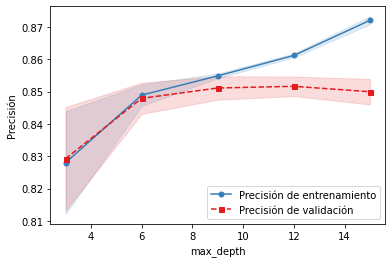

In [38]:
#Para bosques aleatorios
plot_validation_curve(train_scores_bos_a, test_scores_bos_a,
                      max_depths, xlabel='max_depth')
plt.ylim()